# 01. Initial Data Exploration

## Objectives
- Load and understand the Home Credit Default Risk dataset
- Analyze target variable distribution
- Identify missing values
- Explore numerical and categorical features
- Initial correlation analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [2]:
# Data paths
data_dir = Path('../../data/raw/home-credit-default-risk')

# Load main datasets
print("Loading datasets...")
df_train = pd.read_csv(data_dir / 'application_train.csv')
df_test = pd.read_csv(data_dir / 'application_test.csv')
df_bureau = pd.read_csv(data_dir / 'bureau.csv')
df_bureau_balance = pd.read_csv(data_dir / 'bureau_balance.csv')
df_credit_card = pd.read_csv(data_dir / 'credit_card_balance.csv')
df_pos_cash = pd.read_csv(data_dir / 'POS_CASH_balance.csv')
df_previous = pd.read_csv(data_dir / 'previous_application.csv')
df_installments = pd.read_csv(data_dir / 'installments_payments.csv')

print(f"\nDatasets loaded:")
print(f"  - application_train: {df_train.shape}")
print(f"  - application_test: {df_test.shape}")
print(f"  - bureau: {df_bureau.shape}")
print(f"  - bureau_balance: {df_bureau_balance.shape}")
print(f"  - credit_card_balance: {df_credit_card.shape}")
print(f"  - POS_CASH_balance: {df_pos_cash.shape}")
print(f"  - previous_application: {df_previous.shape}")
print(f"  - installments_payments: {df_installments.shape}")

Loading datasets...

Datasets loaded:
  - application_train: (307511, 122)
  - application_test: (48744, 121)
  - bureau: (1716428, 17)
  - bureau_balance: (27299925, 3)
  - credit_card_balance: (3840312, 23)
  - POS_CASH_balance: (10001358, 8)
  - previous_application: (1670214, 37)
  - installments_payments: (13605401, 8)


## 2. Target Variable Analysis

Target Variable (TARGET) Distribution:
TARGET
0    282686
1     24825
Name: count, dtype: int64

Default Rate: 8.0729%
Class Balance: TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


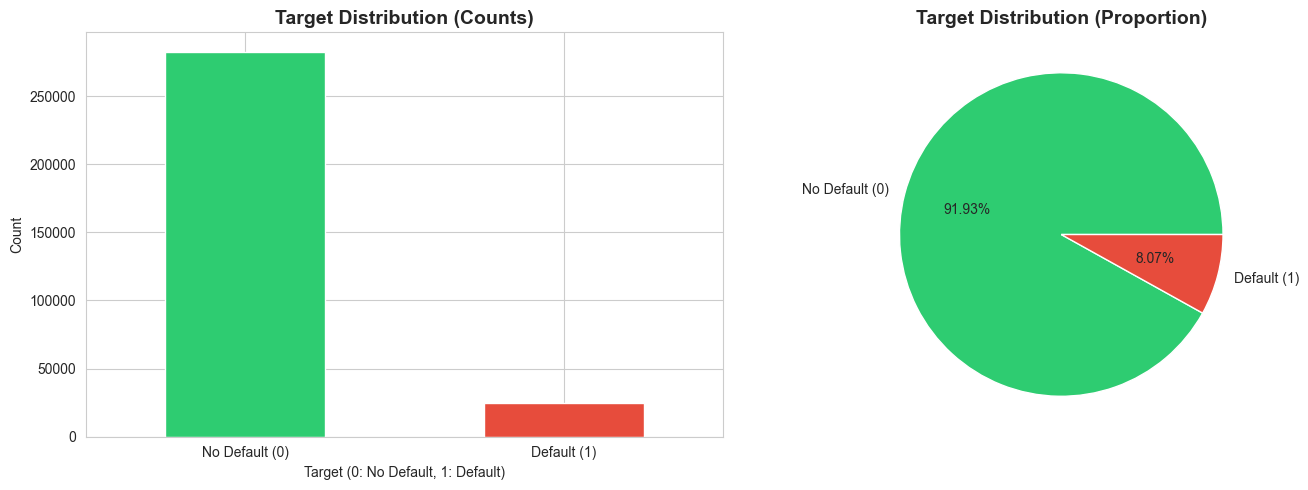

In [3]:
# Target distribution
print("Target Variable (TARGET) Distribution:")
print(df_train['TARGET'].value_counts())
print(f"\nDefault Rate: {df_train['TARGET'].mean():.4%}")
print(f"Class Balance: {df_train['TARGET'].value_counts(normalize=True)}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_train['TARGET'].value_counts().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Target Distribution (Counts)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Target (0: No Default, 1: Default)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['No Default (0)', 'Default (1)'], rotation=0)

# Pie chart
df_train['TARGET'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.2f%%', 
                                        colors=['#2ecc71', '#e74c3c'],
                                        labels=['No Default (0)', 'Default (1)'])
axes[1].set_title('Target Distribution (Proportion)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

⚠️ OBSERVATION: Dataset is highly imbalanced! We'll need to handle this during modeling.

## 3. Data Types and Basic Info

In [4]:
# Basic info
print("Dataset Information:")
print(f"Number of rows: {df_train.shape[0]:,}")
print(f"Number of columns: {df_train.shape[1]}")
print(f"\nMemory usage: {df_train.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types
print("\nData Types:")
print(df_train.dtypes.value_counts())

# Separate numerical and categorical columns
numerical_cols = df_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

# Remove TARGET and ID from numerical
numerical_cols.remove('TARGET')
numerical_cols.remove('SK_ID_CURR')

print(f"\nNumerical features: {len(numerical_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

Dataset Information:
Number of rows: 307,511
Number of columns: 122

Memory usage: 504.99 MB

Data Types:
float64    65
int64      41
object     16
Name: count, dtype: int64

Numerical features: 104
Categorical features: 16


## 4. Missing Values Analysis

Columns with missing values: 67 out of 122

Top 20 columns with highest missing percentages:
                          Missing_Count  Missing_Percentage
COMMONAREA_MEDI                  214865           69.872297
COMMONAREA_AVG                   214865           69.872297
COMMONAREA_MODE                  214865           69.872297
NONLIVINGAPARTMENTS_MODE         213514           69.432963
NONLIVINGAPARTMENTS_AVG          213514           69.432963
NONLIVINGAPARTMENTS_MEDI         213514           69.432963
FONDKAPREMONT_MODE               210295           68.386172
LIVINGAPARTMENTS_MODE            210199           68.354953
LIVINGAPARTMENTS_AVG             210199           68.354953
LIVINGAPARTMENTS_MEDI            210199           68.354953
FLOORSMIN_AVG                    208642           67.848630
FLOORSMIN_MODE                   208642           67.848630
FLOORSMIN_MEDI                   208642           67.848630
YEARS_BUILD_MEDI                 204488           66.497784
YEARS_B

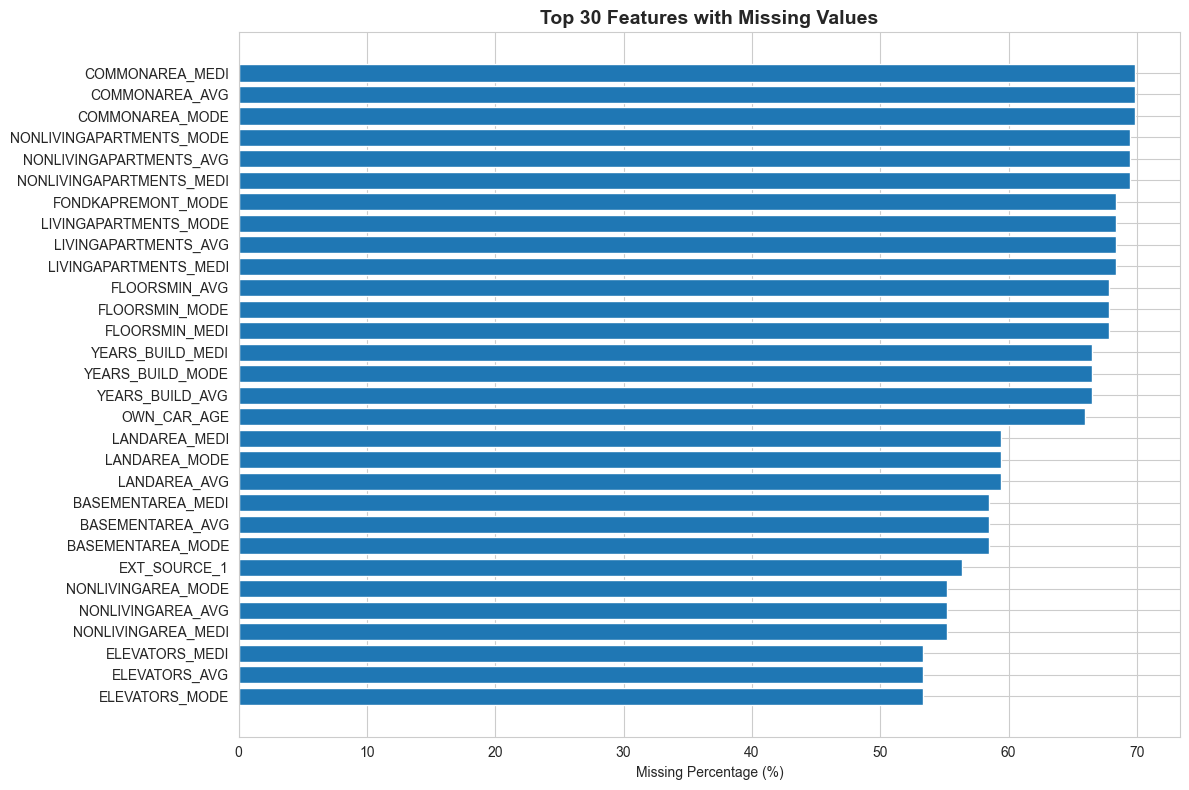

In [5]:
# Calculate missing values
missing = df_train.isnull().sum()
missing_pct = (missing / len(df_train)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
}).sort_values('Missing_Percentage', ascending=False)

# Filter columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0]

print(f"Columns with missing values: {len(missing_df)} out of {df_train.shape[1]}")
print("\nTop 20 columns with highest missing percentages:")
print(missing_df.head(20))

# Visualize missing values
plt.figure(figsize=(12, 8))
top_missing = missing_df.head(30)
plt.barh(range(len(top_missing)), top_missing['Missing_Percentage'])
plt.yticks(range(len(top_missing)), top_missing.index)
plt.xlabel('Missing Percentage (%)')
plt.title('Top 30 Features with Missing Values', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### ⚠️ ACTION ITEMS:
- Features with >50% missing: Consider dropping
- Features with 20-50% missing: Impute carefully
- Features with <20% missing: Standard imputation

## 5. Numerical Features Analysis

In [6]:
# Summary statistics
print("Summary Statistics for Numerical Features:")
print(df_train[numerical_cols].describe())

Summary Statistics for Numerical Features:
        CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  \
count  307511.000000      3.075110e+05  3.075110e+05  307499.000000   
mean        0.417052      1.687979e+05  5.990260e+05   27108.573909   
std         0.722121      2.371231e+05  4.024908e+05   14493.737315   
min         0.000000      2.565000e+04  4.500000e+04    1615.500000   
25%         0.000000      1.125000e+05  2.700000e+05   16524.000000   
50%         0.000000      1.471500e+05  5.135310e+05   24903.000000   
75%         1.000000      2.025000e+05  8.086500e+05   34596.000000   
max        19.000000      1.170000e+08  4.050000e+06  258025.500000   

       AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  \
count     3.072330e+05               307511.000000  307511.000000   
mean      5.383962e+05                    0.020868  -16036.995067   
std       3.694465e+05                    0.013831    4363.988632   
min       4.050000e+04                   

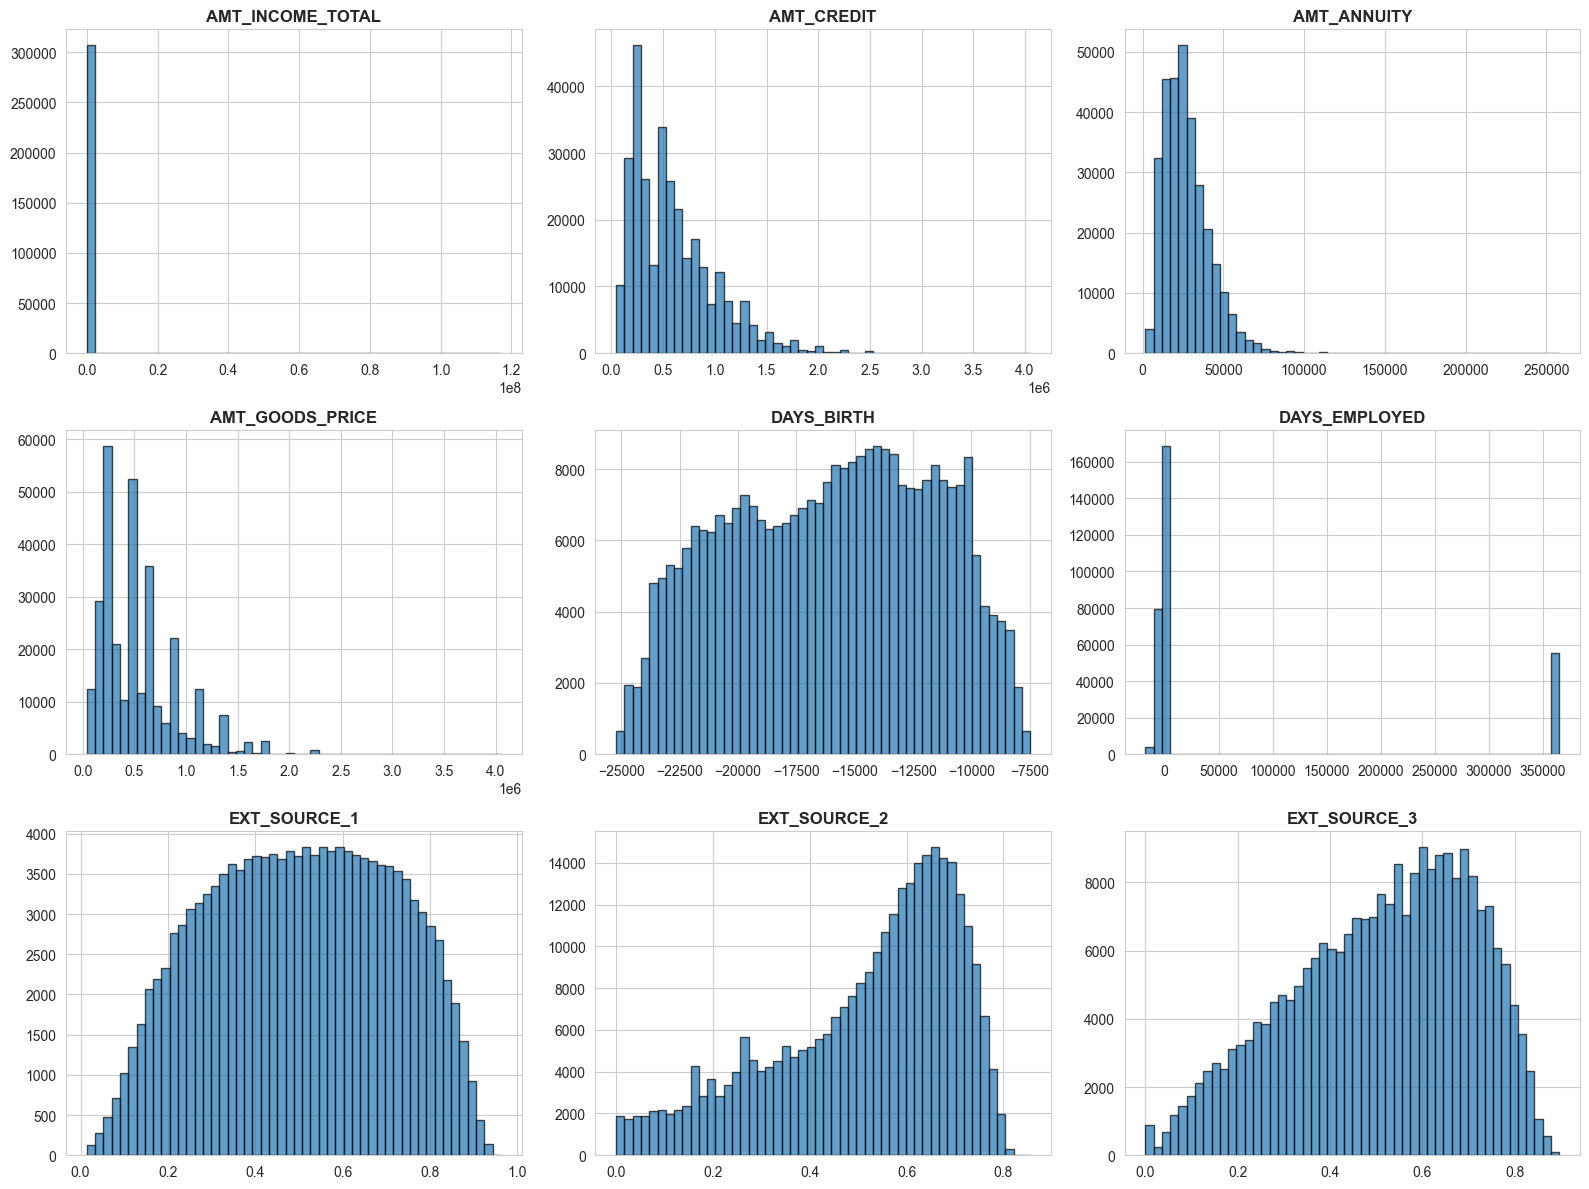

In [7]:
# Key financial features
key_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# Distribution plots
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, col in enumerate(key_features):
    if col in df_train.columns:
        df_train[col].hist(bins=50, ax=axes[idx], edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('')

plt.tight_layout()
plt.show()

## 6. Categorical Features Analysis

In [8]:
# Categorical features info
print("Categorical Features Analysis:\n")
for col in categorical_cols[:10]:  # First 10 categorical features
    print(f"{col} (Unique values: {df_train[col].nunique()}):")
    print(df_train[col].value_counts().head(5))
    print()

Categorical Features Analysis:

NAME_CONTRACT_TYPE (Unique values: 2):
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER (Unique values: 3):
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR (Unique values: 2):
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY (Unique values: 2):
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE (Unique values: 7):
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: count, dtype: int64

NAME_INCOME_TYPE (Unique values: 8):
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Name: count, dtype: int64

NAME_EDUCATION_TYPE (Unique values: 5):
NAME_EDUCATION_TYPE
Secondary / s

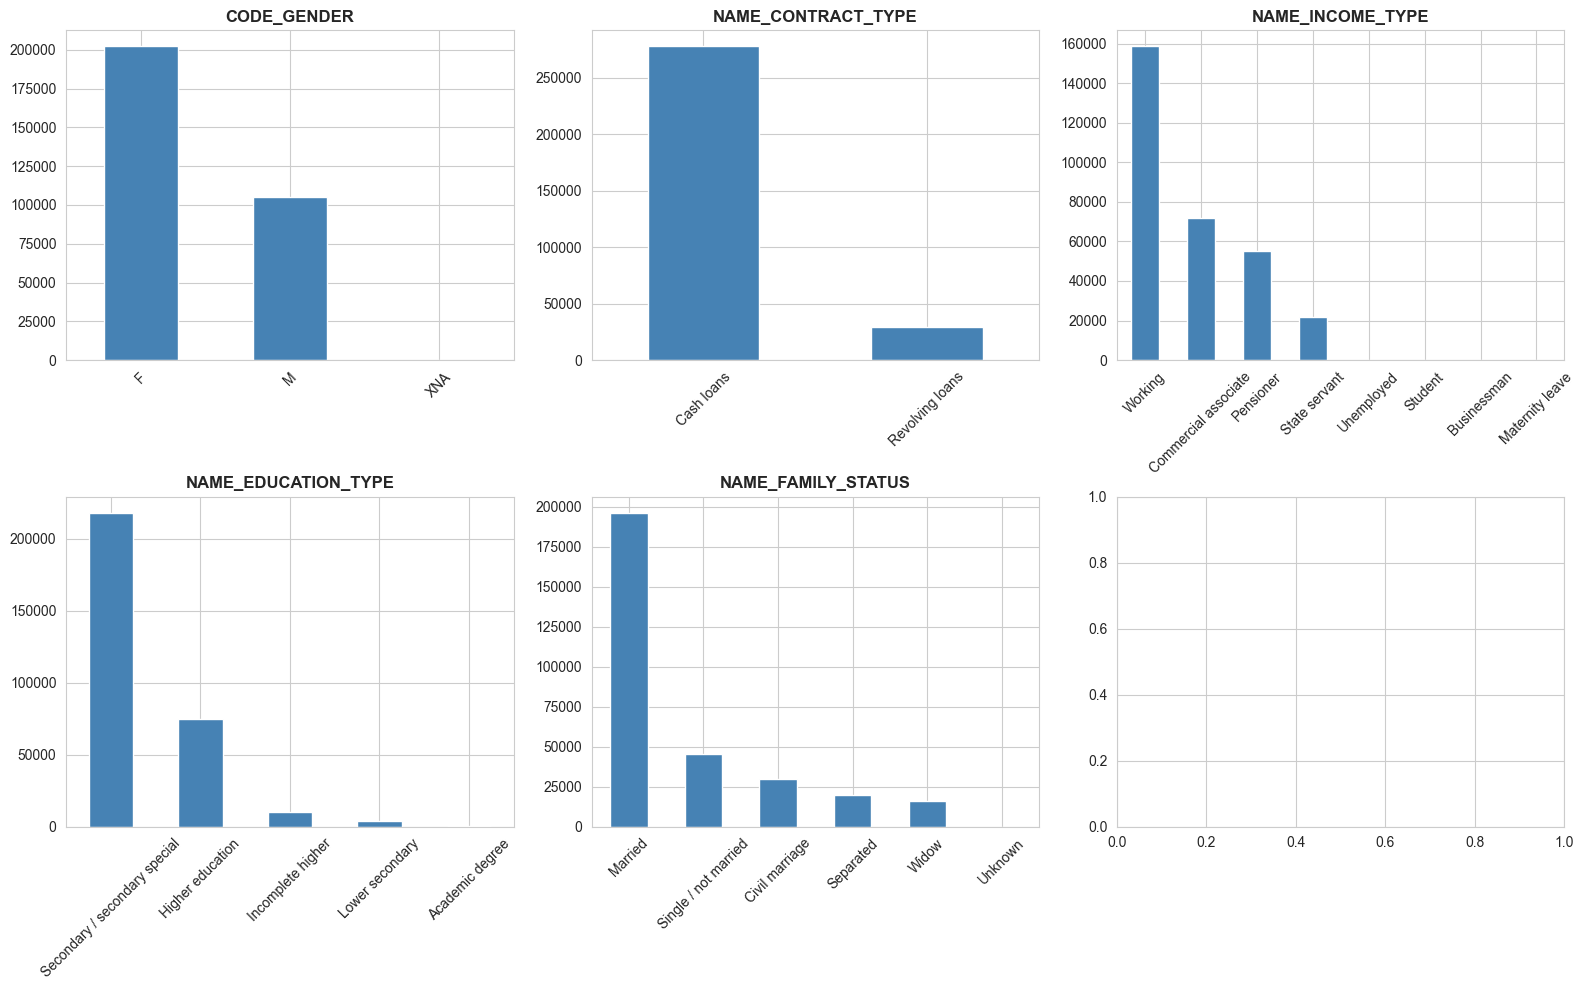

In [9]:
# Key categorical features visualization
key_cat_features = ['CODE_GENDER', 'NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 
                    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(key_cat_features):
    if col in df_train.columns:
        df_train[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 7. Correlation Analysis with Target

Top 20 features correlated with TARGET:
EXT_SOURCE_3                  -0.178919
EXT_SOURCE_2                  -0.160472
EXT_SOURCE_1                  -0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                 -0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                 -0.044003
FLOORSMAX_MEDI                -0.043768
FLOORSMAX_MODE                -0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE               -0.039645
OWN_CAR_AGE                    0.037612
REGION_POPULATION_RELATIVE    -0.037227
dtype: float64


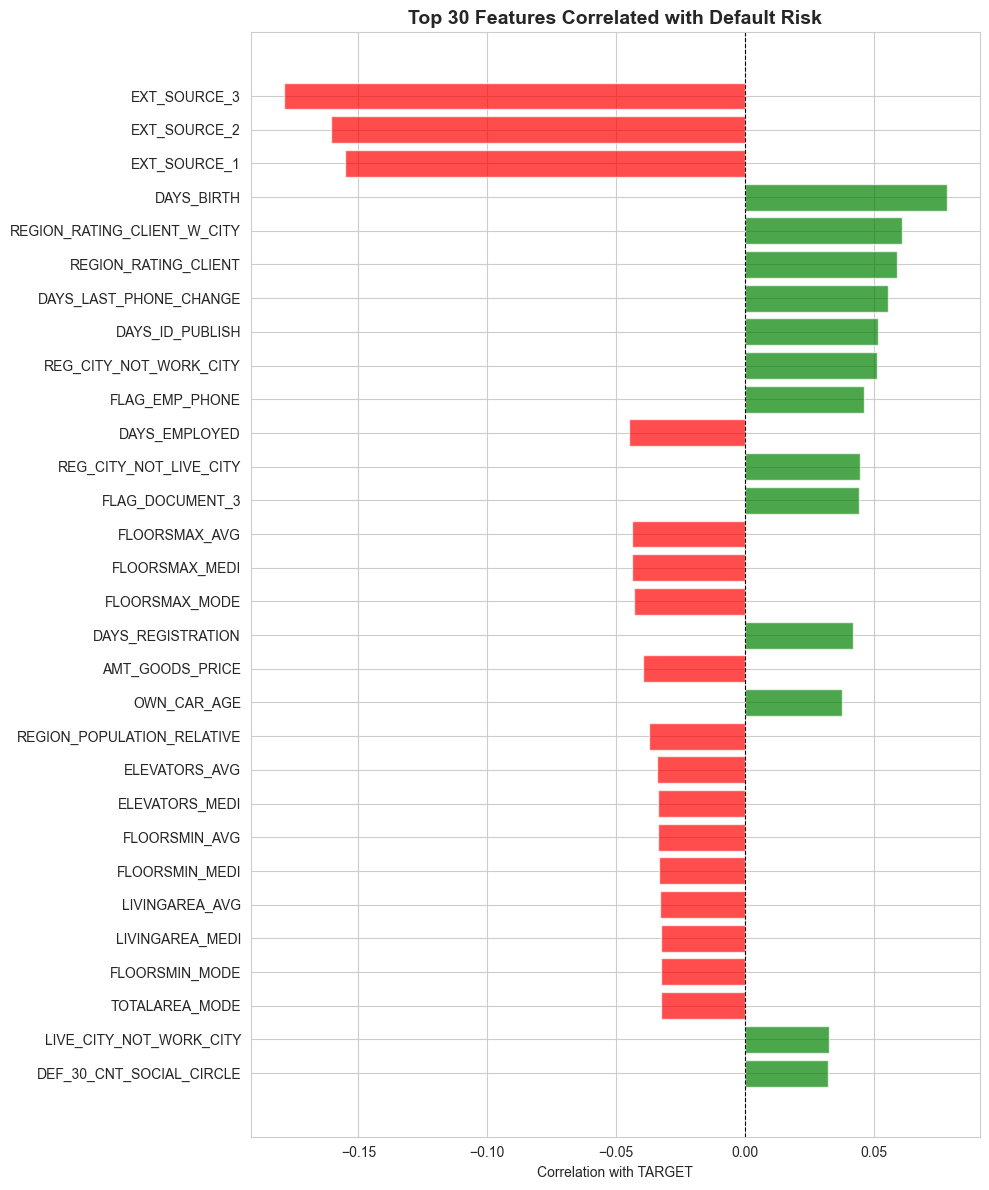

In [10]:
# Calculate correlation with target
correlations = df_train[numerical_cols].corrwith(df_train['TARGET']).sort_values(key=abs, ascending=False)

print("Top 20 features correlated with TARGET:")
print(correlations.head(20))

# Visualization
plt.figure(figsize=(10, 12))
top_corr = correlations.head(30)
colors = ['red' if x < 0 else 'green' for x in top_corr]
plt.barh(range(len(top_corr)), top_corr, color=colors, alpha=0.7)
plt.yticks(range(len(top_corr)), top_corr.index)
plt.xlabel('Correlation with TARGET')
plt.title('Top 30 Features Correlated with Default Risk', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### 💡 Key Insights:
- **EXT_SOURCE features** show strong negative correlation (good predictors!)
- **Days features** need careful interpretation (negative values represent days before application)
- **Region ratings** show moderate correlation with default risk
- Features with negative correlation reduce default probability
- Features with positive correlation increase default probability


## 8. Bivariate Analysis - Key Features vs Target

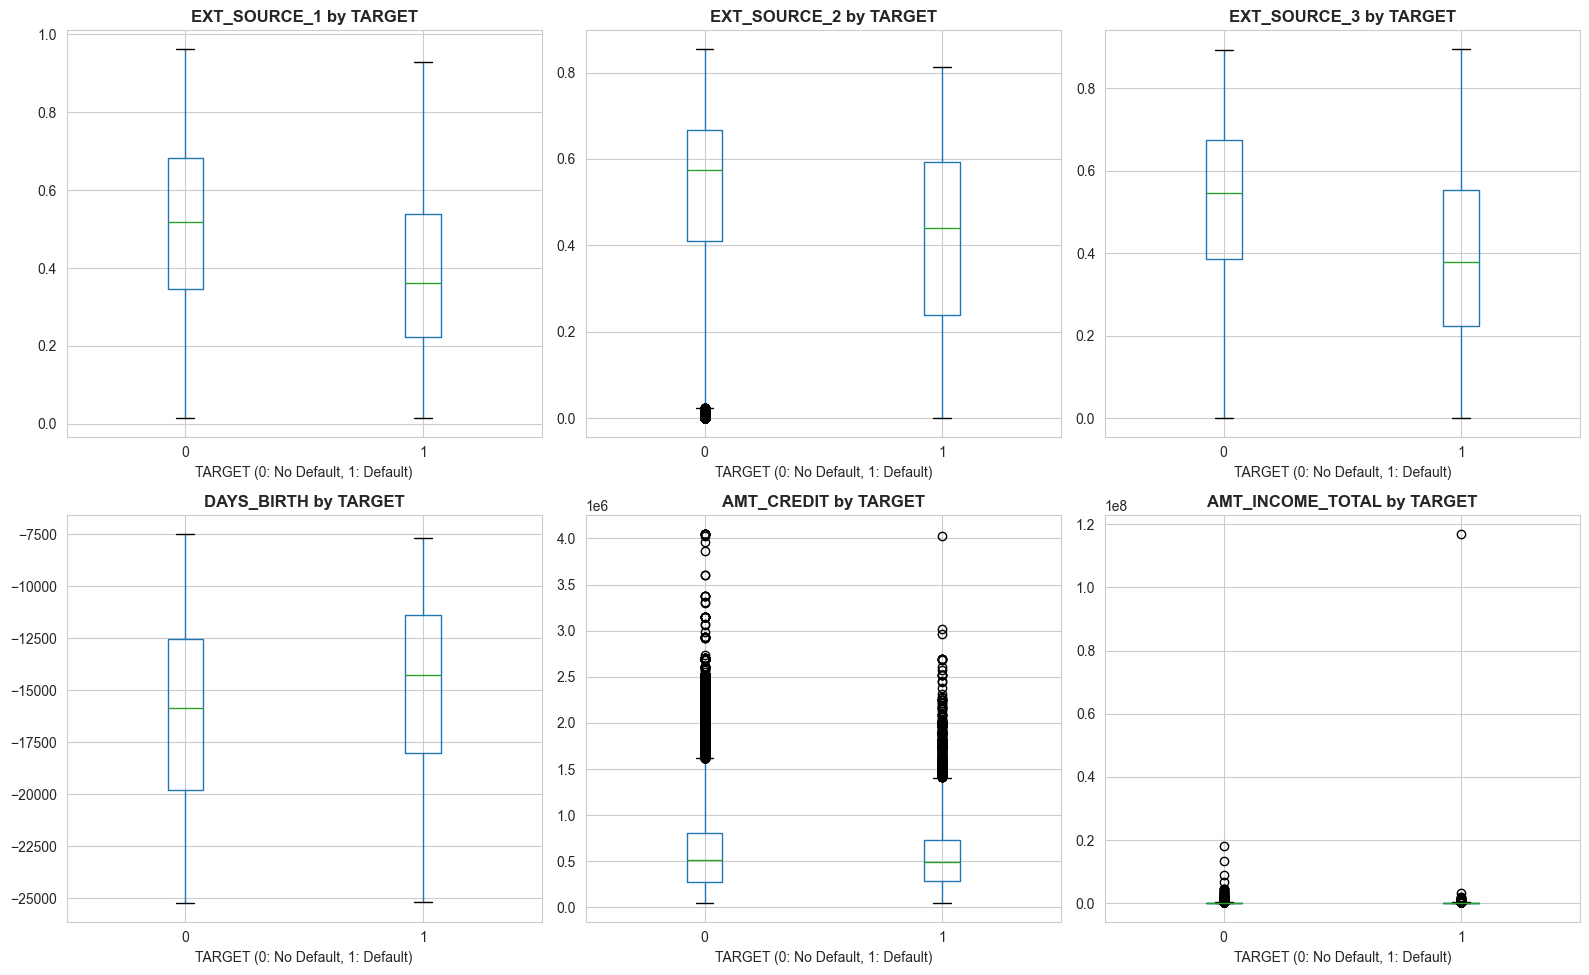

In [11]:
# Box plots for key features by target
key_features_target = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                       'DAYS_BIRTH', 'AMT_CREDIT', 'AMT_INCOME_TOTAL']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, col in enumerate(key_features_target):
    if col in df_train.columns:
        df_train.boxplot(column=col, by='TARGET', ax=axes[idx])
        axes[idx].set_title(f'{col} by TARGET', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('TARGET (0: No Default, 1: Default)')

plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

## 9. Anomalies and Outliers Detection

DAYS_EMPLOYED Analysis:
Max value: 365243
Min value: -17912

Value counts for 365243 (anomaly): 55374


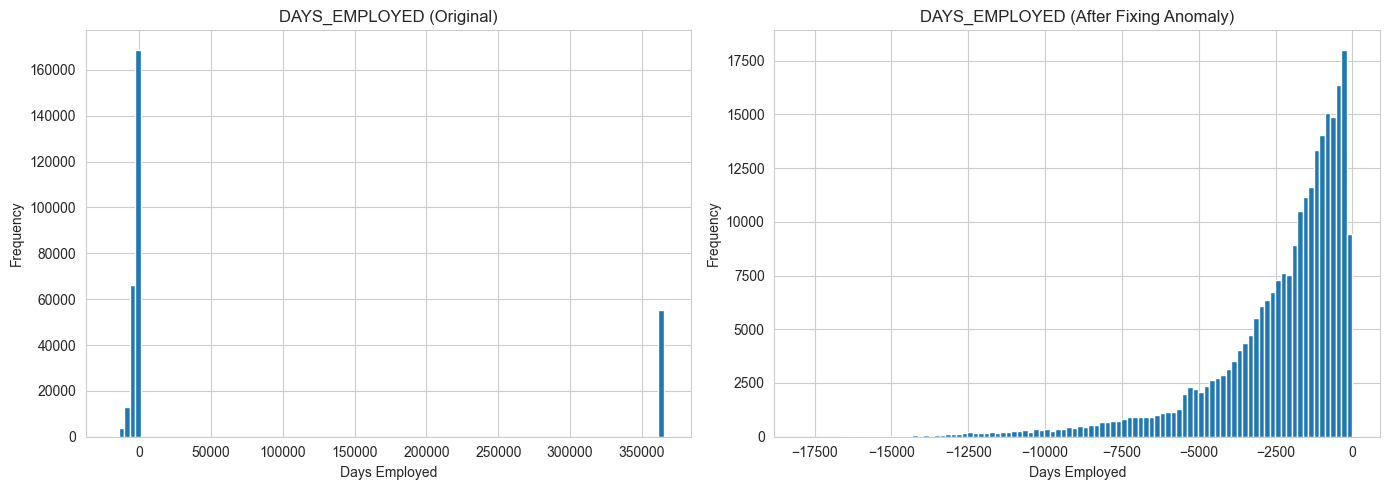

In [12]:
# Check DAYS_EMPLOYED anomaly (known issue in this dataset)
print("DAYS_EMPLOYED Analysis:")
print(f"Max value: {df_train['DAYS_EMPLOYED'].max()}")
print(f"Min value: {df_train['DAYS_EMPLOYED'].min()}")
print(f"\nValue counts for 365243 (anomaly): {(df_train['DAYS_EMPLOYED'] == 365243).sum()}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before fixing
df_train['DAYS_EMPLOYED'].plot(kind='hist', bins=100, ax=axes[0], title='DAYS_EMPLOYED (Original)')
axes[0].set_xlabel('Days Employed')

# After fixing (preview)
days_employed_fixed = df_train['DAYS_EMPLOYED'].replace(365243, np.nan)
days_employed_fixed.plot(kind='hist', bins=100, ax=axes[1], title='DAYS_EMPLOYED (After Fixing Anomaly)')
axes[1].set_xlabel('Days Employed')

plt.tight_layout()
plt.show()

⚠️ ACTION: Replace 365243 with NaN in feature engineering step

## 10. External Tables Quick Look

In [13]:
# Bureau data
print("BUREAU Table:")
print(f"Shape: {df_bureau.shape}")
print(f"Unique applicants: {df_bureau['SK_ID_CURR'].nunique()}")
print(f"\nCredit types:")
print(df_bureau['CREDIT_TYPE'].value_counts().head(10))

# Previous applications
print("\n" + "="*50)
print("PREVIOUS APPLICATIONS Table:")
print(f"Shape: {df_previous.shape}")
print(f"Unique applicants: {df_previous['SK_ID_CURR'].nunique()}")
print(f"\nContract types:")
print(df_previous['NAME_CONTRACT_TYPE'].value_counts())

BUREAU Table:
Shape: (1716428, 17)
Unique applicants: 305811

Credit types:
CREDIT_TYPE
Consumer credit                           1251615
Credit card                                402195
Car loan                                    27690
Mortgage                                    18391
Microloan                                   12413
Loan for business development                1975
Another type of loan                         1017
Unknown type of loan                          555
Loan for working capital replenishment        469
Cash loan (non-earmarked)                      56
Name: count, dtype: int64

PREVIOUS APPLICATIONS Table:
Shape: (1670214, 37)
Unique applicants: 338857

Contract types:
NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64


## Summary and Next Steps

### Key Findings:
1. **Imbalanced Dataset**: Only ~8% default rate - need SMOTE or class weights
2. **Missing Values**: Many features have >40% missing - need strategy
3. **Strong Predictors**: EXT_SOURCE features show strong correlation
4. **Known Anomaly**: DAYS_EMPLOYED has 365243 anomaly value
5. **Rich External Data**: Bureau and previous applications can provide valuable features

### Next Steps:
1. ✅ Complete initial exploration
2. ⏭️ Anomaly detection and outlier handling (notebook 02)
3. ⏭️ Feature engineering and aggregations (notebook 03)
4. ⏭️ Feature selection and preprocessing (notebook 04)
5. ⏭️ Model training and evaluation (training notebooks)